Learning Linear Regression from scratch from the Boston dataset.  Code adopted from: https://github.com/prateeksharma51/Multivariate-Linear-Regression-from-scratch-in-python/blob/master/Multivariate_Linear_Regression_from_Scratch.ipynb

In [48]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import numpy as np
boston = load_boston()
from sklearn.linear_model import LinearRegression

In [49]:
#print(boston.DESCR)

Print just a bit of the dataset to get a feeling...

In [50]:
print("Shape of Dataset : ", boston.data.shape)
print("Feature names : ", boston.feature_names)
print("Target Values : ", boston.target[:20])

Shape of Dataset :  (506, 13)
Feature names :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Target Values :  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2]


Split the data into the X (dependent variables) and Y (independent variable / target). See https://en.wikipedia.org/wiki/Dependent_and_independent_variables for more if you like.

In [51]:
import pandas as pd
X = pd.DataFrame(boston.data, columns = boston.feature_names)
Y = boston.target   
print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Now let's split the data into training and testing. Note that no cross validation is done here.

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_train.head(2))                                          
print(X_train.head(2))

(339, 13)
(167, 13)
(339,)
(167,)
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
435  11.1604  0.0  18.10   0.0  0.740  6.629  94.6  2.1247  24.0  666.0   
88    0.0566  0.0   3.41   0.0  0.489  7.007  86.3  3.4217   2.0  270.0   

     PTRATIO       B  LSTAT  
435     20.2  109.85  23.27  
88      17.8  396.90   5.50  
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
435  11.1604  0.0  18.10   0.0  0.740  6.629  94.6  2.1247  24.0  666.0   
88    0.0566  0.0   3.41   0.0  0.489  7.007  86.3  3.4217   2.0  270.0   

     PTRATIO       B  LSTAT  
435     20.2  109.85  23.27  
88      17.8  396.90   5.50  


Let's standardize the data. There are two ways: The built-in way (which we'll use) and from scratch.

In [53]:
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.fit_transform(X_test)
#X_train_standardized = (X_train - X_train .mean()) / X_train.std()
#X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()

Let's setup the variable for the process.  We'll cap the number of iterations at 300 and the set the learning rate to 0.05 (completely open to change). We'll store the error values in a variable called MSE (and we'll define the error function very soon).

In [54]:
MSE_points = []
num_iterations = 300
learning_rate = 0.05

Now it's time for gradient descent. First, we'll define our cost function:
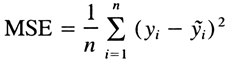

In [55]:
def error_function(y_actual,y_predicted):
    error = 0
    for i in range(0,len(y_actual)):
        error =  error + pow((y_actual[i] - y_predicted[i]),2)
        return error/(2*len(y_actual))

Now for gradient descent itself: 

In [56]:
def gradient_descent(y_actual,y_pred,x):
    grad = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        for j in range(0,len(y_actual)):
            grad[i] = - (y_actual[j] - y_pred[j])*x[j][i] + grad[i]
    return grad/len(y_actual)

This will be called within a loop to set the weights. Note that the "b" term is added in the line: w = np.append(w,1)

In [57]:
def weights(x_train,y_train,num_iterations,learning_rate):
    no_of_rows = x_train.shape[0]
    no_of_columns = x_train.shape[1]
    new_x_train = np.ones((no_of_rows,no_of_columns+1))
    new_x_train[:,0:no_of_columns] = x_train
    w = np.zeros(no_of_columns)
    w = np.append(w,1)
    for i in range(0,num_iterations):
        y_pred = y_predicted(w,new_x_train)
        error = error_function(y_train,y_pred)
        #print("mean square error: ",error,"after",i,"th iteration")
        MSE_points.append(error)
        grad = gradient_descent(y_train,y_pred,new_x_train)
        w = w - learning_rate*grad
    return w

Now that we have our weights we can predict (use) the model with the weights, w (also called theta in our slides).  Note that this process uses two loops: One for weights to go through all values, and one for the gradient descent. In our lectures we'll talk about using vectorization to eliminate this and you'll get to do that too!

In [58]:
def y_predicted(w,x):
    y_pred = np.zeros(len(x))
    for i in range(0,len(x)):
        for j in range(0,len(w)):
            y_pred[i] = y_pred[i]+(w[j]*x[i][j] + w[-1])
    return y_pred

def regression_test(x_test,w):
    row = x_test.shape[0]
    column = x_test.shape[1]
    new_x_test = np.ones((row,column+1))
    new_x_test[:,0:column] = x_test
    y_pred = y_predicted(w,new_x_test)
    return(y_pred)

Now we call the above functions!

In [59]:
w = weights(X_train_standardized,Y_train,num_iterations,learning_rate)
Y_pred = regression_test(X_test_standardized,w)
error_function(Y_test,Y_pred)

7.565455068246605e-05

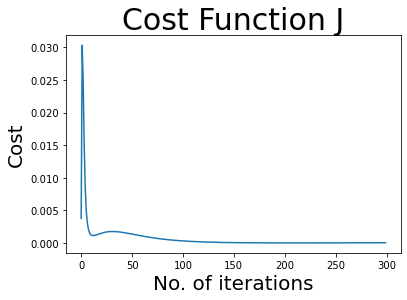

In [60]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(MSE_points)
plt.show()

How well did we do?  Well we can check it on the data:

In [61]:
pred_df = pd.DataFrame(
    {
        'Actual Value' : Y_test, 
     'Predicted Values' : Y_pred,
    }
)
print(pred_df.head(10))

   Actual Value  Predicted Values
0          37.6         37.441039
1          27.9         31.107502
2          22.6         27.731070
3          13.8          7.035984
4          35.2         33.793262
5          10.4          6.911219
6          23.9         27.430177
7          29.0         30.161003
8          22.8         27.303488
9          23.2         22.764373


We can also use the built-in MSE functions from scikit learn

In [62]:
from sklearn.metrics import mean_squared_error
MSE_custom_LR_Model = mean_squared_error(Y_test, Y_pred)
print('Linear Regression (From Scratch)', str(MSE_custom_LR_Model))

Linear Regression (From Scratch) 28.342575757815766


Ok, but how does this compare with the built-in implementation?  Not bad!  Let's see!

In [63]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
y_pred_from_sklearn = lm.predict(X_test)
MSE_sklearn_LR_Model = mean_squared_error(Y_test, y_pred_from_sklearn)
print('Linear Regression (SKLEARN)', str(MSE_sklearn_LR_Model))

Linear Regression (SKLEARN) 28.53045876597469


So just to summarize: 

In [64]:
print('Linear Regression (From Scratch)', str(MSE_custom_LR_Model))
print('Linear Regression (SKLEARN)', str(MSE_sklearn_LR_Model))

Linear Regression (From Scratch) 28.342575757815766
Linear Regression (SKLEARN) 28.53045876597469
